### Name : Shravan Bharat Devrukhkar
### College Name : Dr. Babasaheb Ambedkar Technological University, Lonere
### Title : Exploratory Data Analysis on Diabetes Dataset

**Description:**

This project involves performing Exploratory Data Analysis (EDA) on the Pima Indians Diabetes Dataset to uncover hidden patterns, identify important features, and prepare the data for future machine learning tasks.

The dataset contains health-related data of female patients, including variables such as Glucose, Blood Pressure, BMI, and Age, along with a binary outcome indicating whether the patient is diabetic (1) or not (0).

**Project Goals:**

Understand the structure and distribution of the data.

Clean the dataset by handling missing and invalid values.

Use statistical summaries and visualizations (histograms, boxplots, correlation heatmaps) to explore feature relationships.

Identify which features are most correlated with diabetes



## 1. Introduction

This notebook performs Exploratory Data Analysis (EDA) on the Pima Indians Diabetes dataset. 
Our goal is to understand the dataset’s structure, clean the data, visualize key relationships.

We will cover:
- Data cleaning and preprocessing
- Descriptive statistics
- Data visualization
- Correlation analysis
- Feature insights


## 2. Importing Libraries


In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## 3.Loading Dataset


In [33]:
# 3. Loading the Dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## 4. Basic Information About the Dataset

We begin by understanding the shape, size , data types, and general information about the dataset.


In [36]:
df.info()   # Shows column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df.describe() # Shows basic statistics for numerical columns like mean , mode , median

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.shape  # Shows the number of rows and columns

(768, 9)

In [7]:
df.size

6912

###  Explanation:
- `df.info()` shows that there are 768 entries and all 9 columns have non-null values.
- `df.shape` confirms we have 768 rows and 9 columns.
- `df.describe()` gives us summary statistics — like mean, std, min, and max

# 5.Data Cleaning

In [8]:
# Check if any standard missing values (NaN) are present
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


###  Explanation:
This tells us how many missing (NaN) values are present in each column.  
Initially, we see **no NaN values**, but in reality, **some columns like SkinThickness , Insulin, etc., have 0s**, which are not valid in medical terms.


In [11]:
# Columns where 0 is not a valid value
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count number of 0s in each of these columns
(df[cols_with_zeros] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

###  Explanation:
This reveals that some important columns contain many 0s, which are **invalid medical values** (e.g., BMI or Glucose can not be 0).  
So we consider these 0s as **missing values**.


In [12]:
# Replace invalid 0s with NaN so we can impute them
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

###  Explanation:
Now we convert these zeroes into NaN (missing values) to treat them correctly during imputation.


In [13]:
# Replace NaNs with median values for each column
for col in cols_with_zeros:
    df.fillna({col: df[col].median()}, inplace=True)

In [14]:
# Columns where 0 is not a valid value
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Count number of 0s in each of these columns
(df[cols_with_zeros] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

###  Explanation:
We fill the missing values using the **median** of each column because:
- It is not affected by extreme outliers.
- It's more robust than the mean for medical data.

Now the dataset has **no missing values**, and is clean for analysis.


In [15]:
# Check if any duplicate rows exist
df.duplicated().sum()


np.int64(0)

###  Explanation:
This checks for completely duplicate rows.  
If duplicates are found, we can remove them using `df.drop_duplicates()`.  
In our case, there are **no duplicates**, so we can move forward.


# 6. Data Types and Feature Classification

## Explanation:

All columns in the diabetes dataset are **numerical**, but they fall into different subtypes:

###  Discrete Variables:
- These are numeric variables that take **whole number values only** (not decimals).
- They usually represent **counts** or **number of events**.
-  Examples in our dataset:
  - `Pregnancies`: number of times a patient has been pregnant.
  - `Age`: can be considered discrete in this dataset (it's in whole years, not months or decimals).

###  Continuous Variables:
- These are numeric variables that can take **any value within a range**, including decimals.
- They often represent **measurements**.
-  Examples in our dataset:
  - `Glucose`, `BloodPressure`, `Insulin`, `BMI`, `SkinThickness`

###  Categorical/Binary Variables:
- These represent **groups, classes, or categories** instead of measurable quantities.
- Binary is a type of categorical variable with **only two possible values**.
-  Example:
  - `Outcome`: This is a **binary categorical variable** — 0 = non-diabetic, 1 = diabetic.


###  Why this matters:
- Helps choose the **right charts** (e.g., boxplots for continuous, bar plots for categorical).
- Important for **modeling** — e.g., many ML models need categorical variables to be converted to numbers.
- Affects how we handle **missing values**, scale data, and encode features.


# 7. Univariate Analysis




**What it means:**  
We analyze **one variable at a time**.

**Why we do it:**  
To understand the basic properties of a single column like:
- Central tendency (mean, median, mode)
- Spread (range, variance, standard deviation)
- Distribution (normal, skewed, etc.)
- Outliers

**Examples from our dataset:**
- Histogram of `Glucose`
- Boxplot of `BMI`
- Value counts of `Outcome` (0s vs 1s)

**When to use:**  
When you want to **understand a single column** — how it behaves, how it's distributed, and whether it has errors or outliers.


## 7.1 Histograms

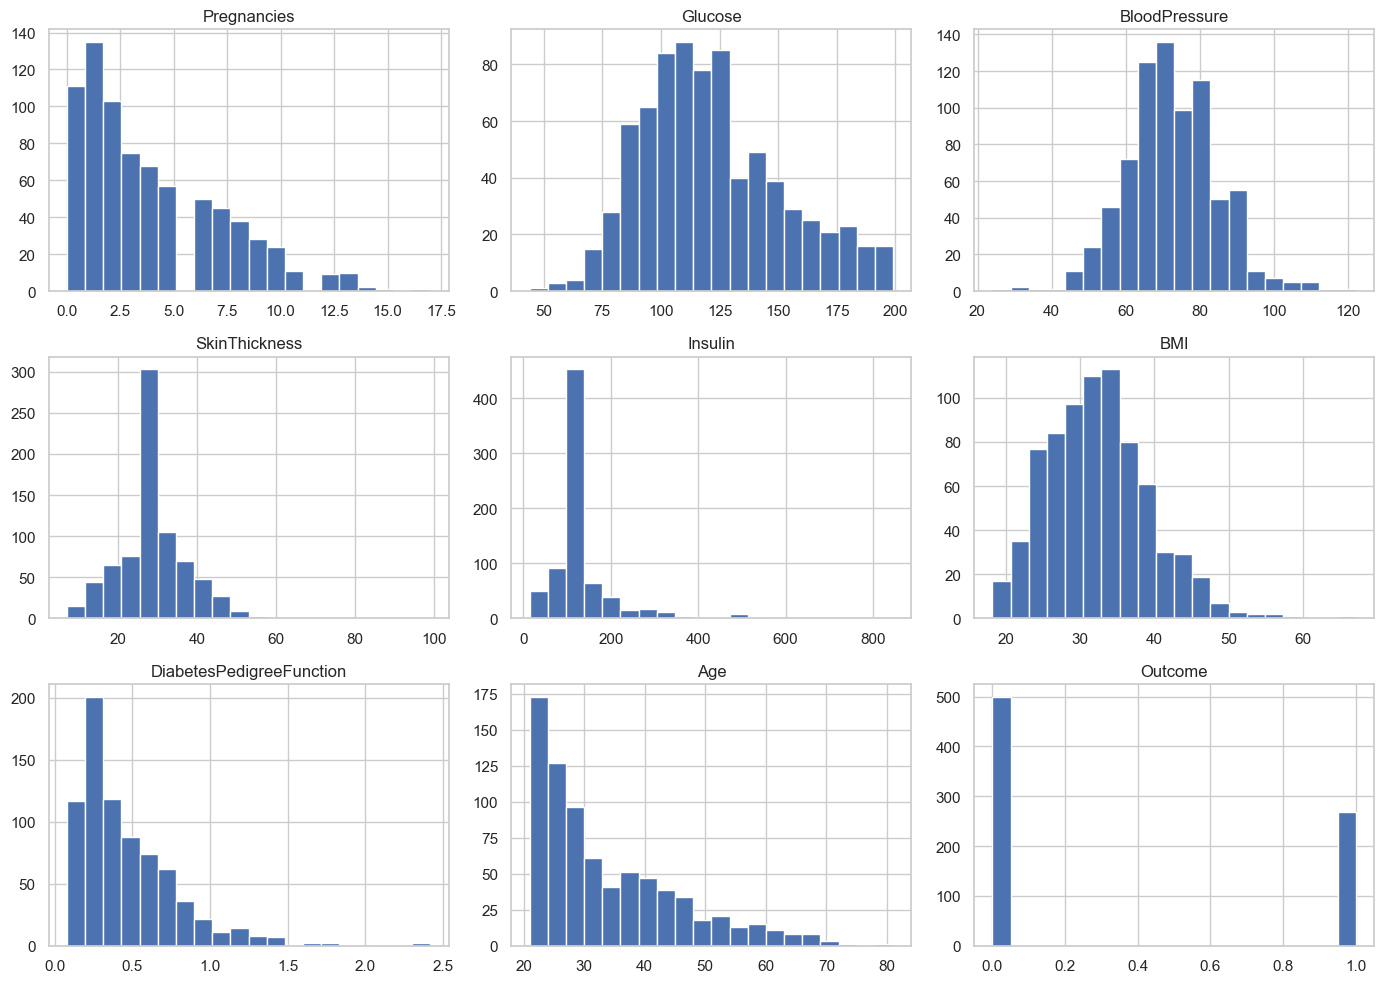

In [16]:
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()


###  Explanation:
We use histograms to understand the **distribution (shape)** of each feature.

- **Glucose, BMI, and Age** have right-skewed distributions, meaning most values are lower but some are very high.
- **Pregnancies** mostly range from 0 to 5 — very few people have high pregnancy counts.
- **Outcome** has more 0s than 1s — meaning more non-diabetic patients in the dataset.

 This helps us understand the balance of data and plan preprocessing like scaling or balancing.


1. Pregnancies
X-axis: Number of pregnancies

Y-axis: Number of women with that many pregnancies

 Most women have 0–5 pregnancies, with very few above that.

2. Glucose
X-axis: Glucose concentration 

Y-axis: Number of patients

 Most glucose values lie between 80 and 140. Skewed slightly right — some patients have very high glucose levels.

3. BloodPressure
X-axis: Diastolic blood pressure (mm Hg)

Y-axis: Number of patients

 Most common values are between 60 and 80. Looks like a normal distribution.

4. SkinThickness
X-axis: Skin thickness (mm)

Y-axis: Number of patients

 Most values are between 10 and 40 mm. Notice a sharp peak at ~20, possibly due to imputation.

5. Insulin
X-axis: Serum insulin level (mu U/ml)

Y-axis: Number of patients

 Highly right-skewed — most patients have very low insulin levels, but some go over 600+, which are potential outliers.

6. BMI (Body Mass Index)
X-axis: BMI (kg/m²)

Y-axis: Number of patients

 Most patients fall in the 30–40 range, indicating many are overweight or obese.

7. DiabetesPedigreeFunction
X-axis: Score indicating diabetes heredity

Y-axis: Number of patients

 Most people score between 0 and 0.5, meaning lower genetic risk. A few outliers above 1.0.

8. Age
X-axis: Age in years

Y-axis: Number of patients

 Most patients are between 20 and 40 years old. This variable is also right-skewed, meaning fewer older individuals.

9. Outcome
X-axis: 0 = non-diabetic, 1 = diabetic

Y-axis: Number of patients in each class

 Imbalance: more non-diabetic (0) than diabetic (1) cases. This is a binary categorical feature.

    


I used histograms to understand the distribution, range, and frequency of values in each feature, and to identify any outliers or data imbalance.

## 7.2 Boxplots

### Explanation:
Boxplots are used for **univariate analysis** to **visually identify outliers** and understand the **spread** of the data.


Text(0.5, 1.0, 'Boxplots for all variables')

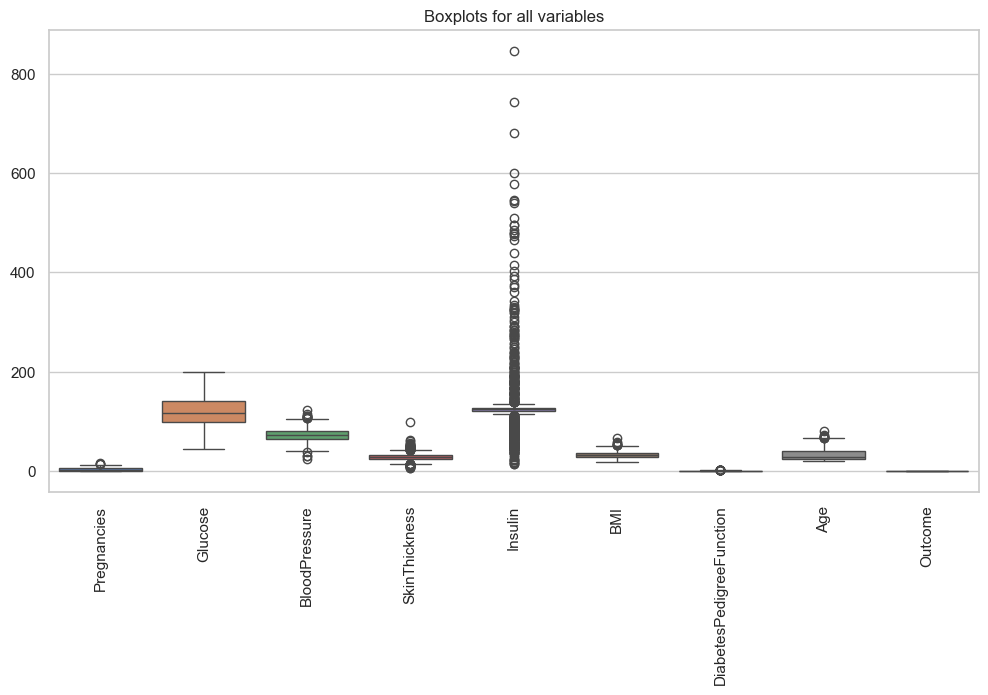

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots for all variables")




###  Insights from our boxplot:
- **Insulin** and **SkinThickness** have a lot of high outliers.
- **BMI** and **Glucose** also have some mild outliers.
- Other features like **Pregnancies** and **Age** are more spread out.



## 7.3 Piecharts

### Explanation:
A pie chart is a **circular statistical graph** used to show the **proportional distribution** of a **single categorical variable**.


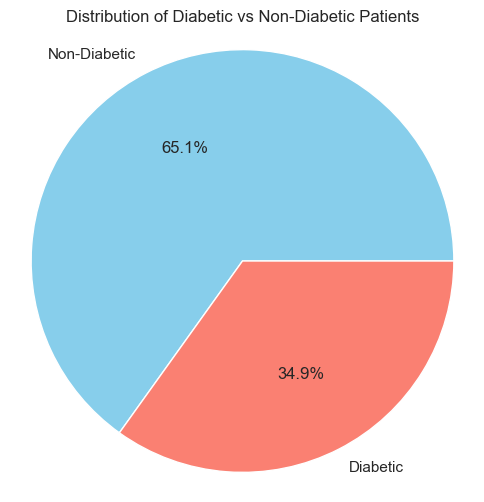

In [18]:

labels = ['Non-Diabetic', 'Diabetic']
values = df['Outcome'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Distribution of Diabetic vs Non-Diabetic Patients")
plt.axis('equal')
plt.show()



###  Insights from our piechart :
- **Imbalanced data** – More non-diabetic than diabetic patients
- **Model bias risk** – May favor non-diabetic predictions
- **Solution** – Use resampling (e.g., SMOTE) or class weights
- **Medical insight** – Indicates health trend or risk group

## 8. Bivariate Analysis

We analyze the **relationship between two variables**.

To see how one variable affects another. It helps us:
- Understand associations (e.g., correlation between `Glucose` and `Outcome`)
- Compare distributions (e.g., BMI for diabetic vs non-diabetic)
- Spot trends or differences between groups

## 8.1 Boxplot

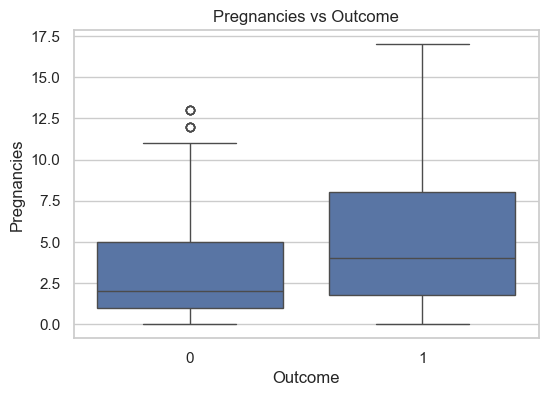

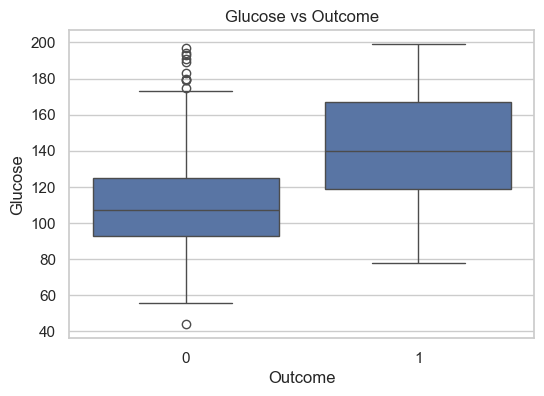

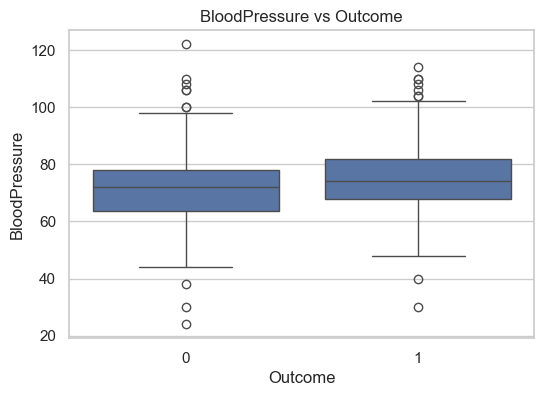

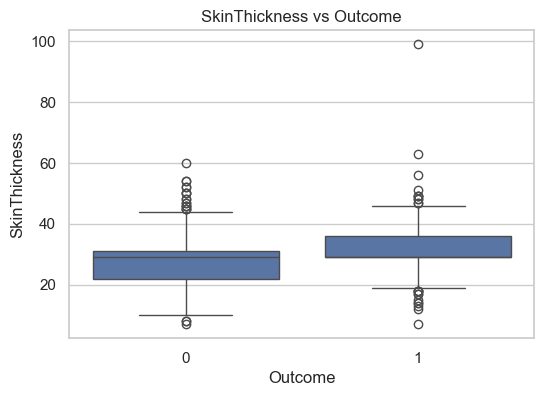

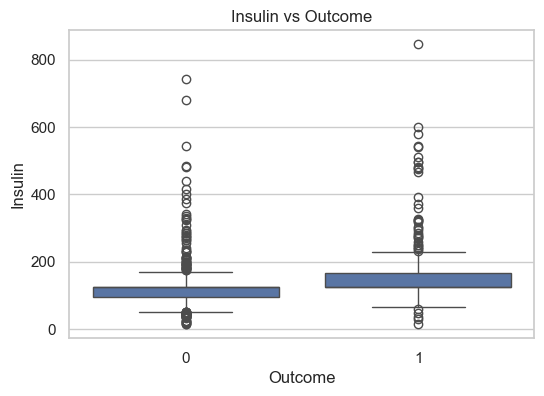

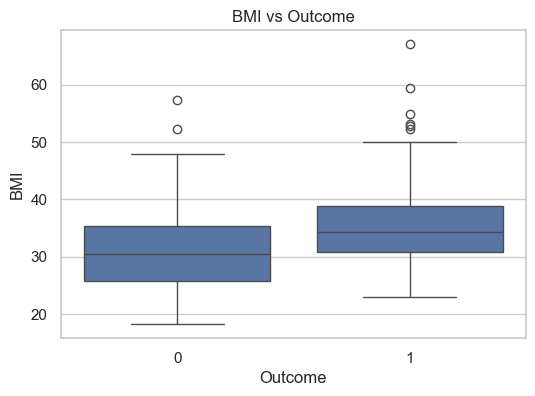

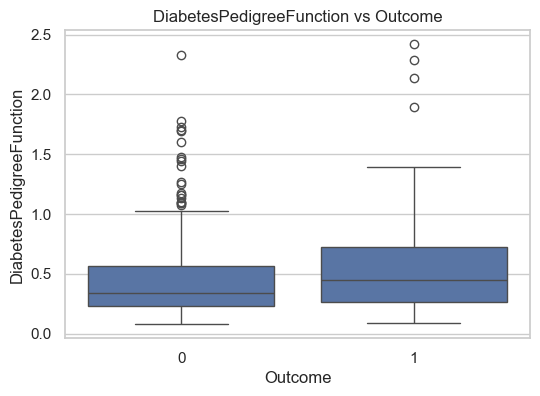

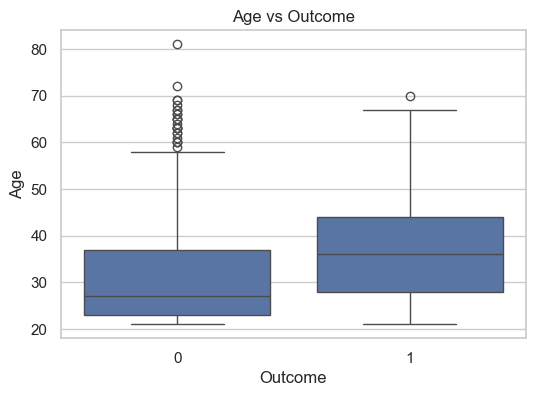

In [19]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} vs Outcome")
    plt.show()


###  Explanation:
We compare each feature with the **Outcome** column (diabetic = 1, non-diabetic = 0).

- Diabetics tend to have **higher Glucose, BMI, Age, and Insulin**.
- Non-diabetics usually have **lower values** in these features.

 This gives early insights into **which features are likely important** for predicting diabetes.

 




## 8.2 Linechart

### Explanation:
Line charts are ideal for showing how one **numeric variable changes** with another in a continuous, connected way — like age vs glucose levels.


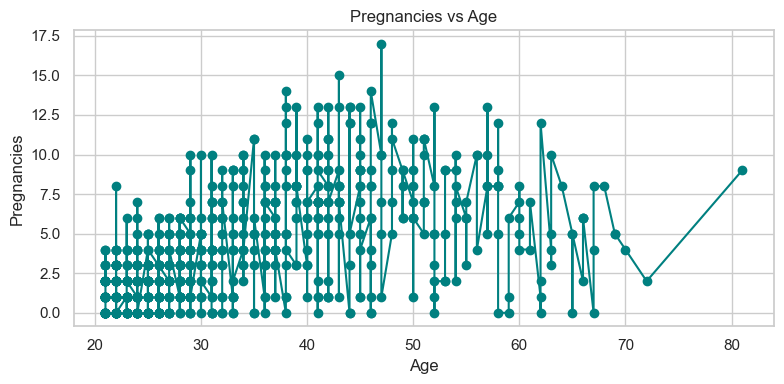

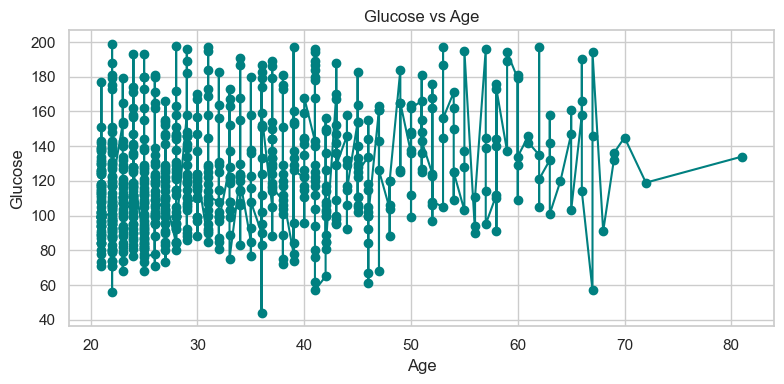

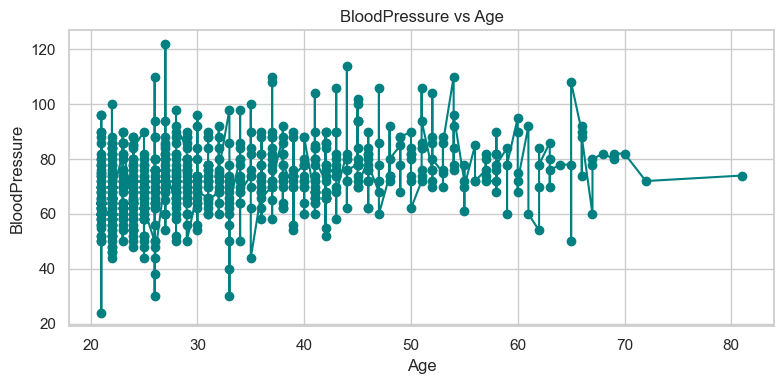

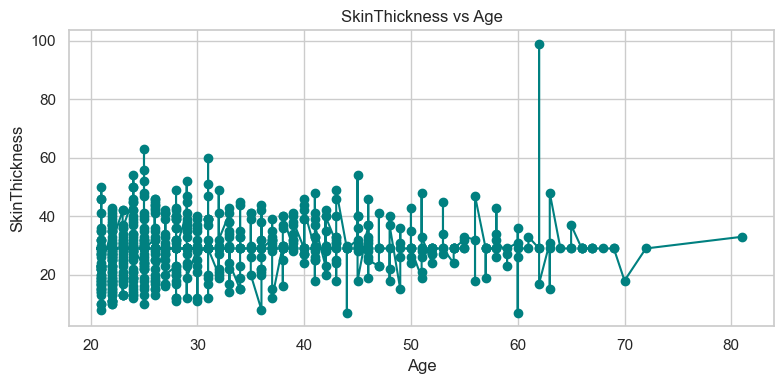

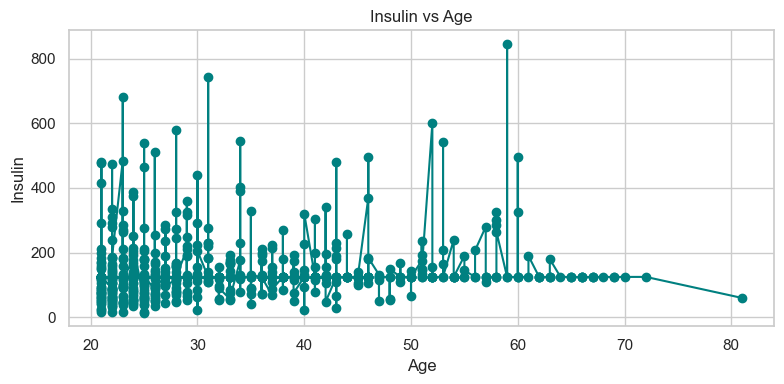

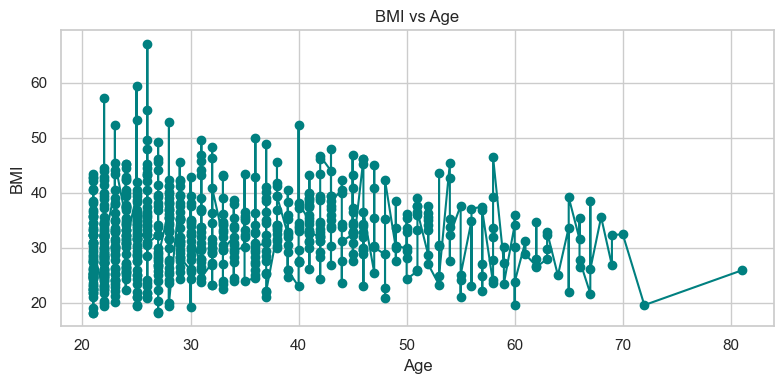

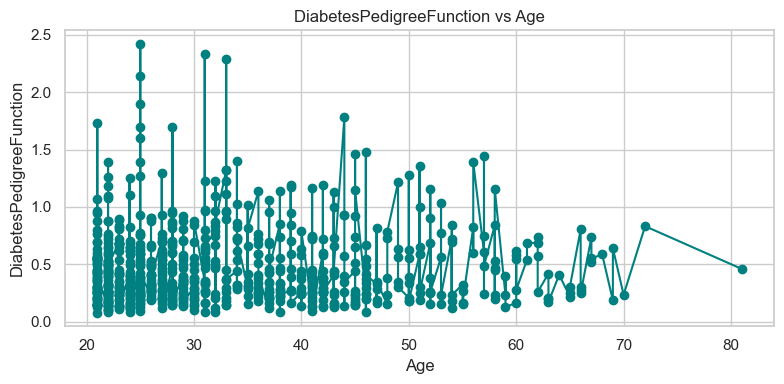

In [20]:
# Sort data by Age
df_sorted = df.sort_values(by='Age')

# Line chart for each feature (excluding Outcome)
for col in df.columns[:-1]:  # Exclude 'Outcome'
    if col != 'Age':  # Don't plot Age vs Age
        plt.figure(figsize=(8, 4))
        plt.plot(df_sorted['Age'], df_sorted[col], marker='o', linestyle='-', color='teal')
        plt.title(f"{col} vs Age")
        plt.xlabel("Age")
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()




###  Insights from our linechart :
- Glucose & Blood Pressure: Increase with age — higher diabetes risk in older adults.
- BMI: Stays high across all ages, slightly rises with age — indicates weight-related risk.
- Insulin: Irregular spikes in older ages — possible insulin resistance or outliers.
- Pregnancies: Low in youth, peaks in middle age — follows natural pattern.
- SkinThickness: No clear age pattern — weak correlation.
- DiabetesPedigreeFunction: Slightly increases with age — shows hereditary risk.



## 8.3 Barchart
A bar chart is a graphical representation used to display and compare the average, count, or total values of a categorical variable across different categories using rectangular bars.

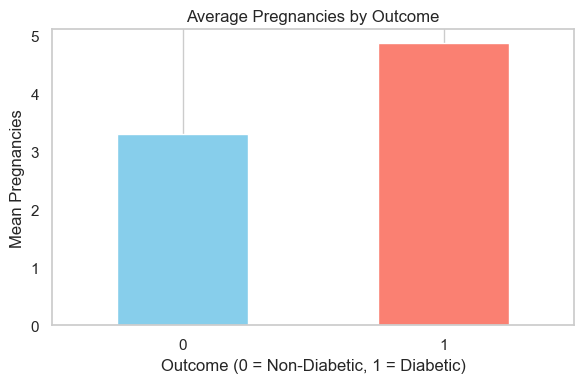

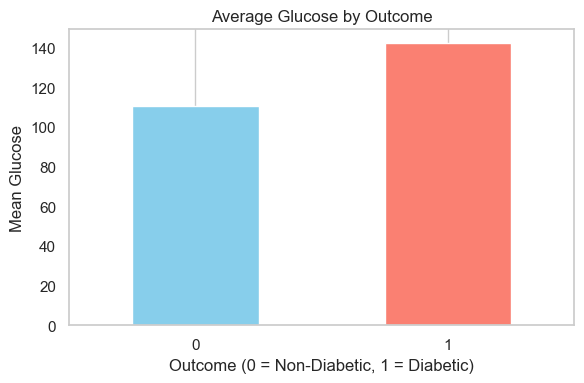

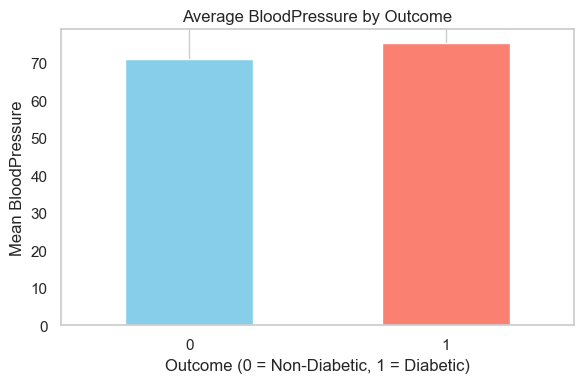

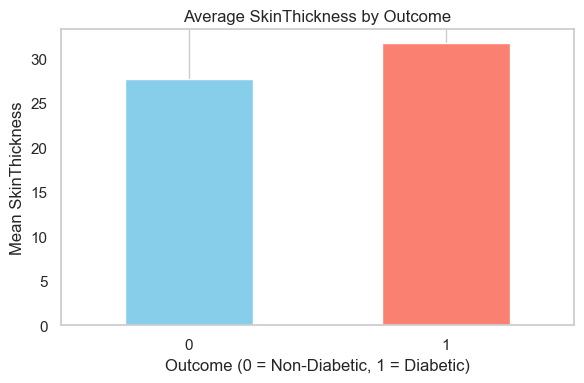

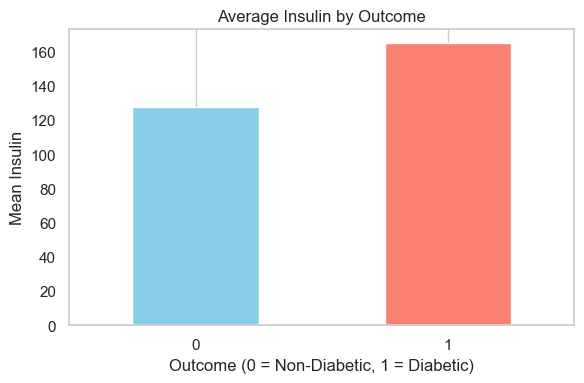

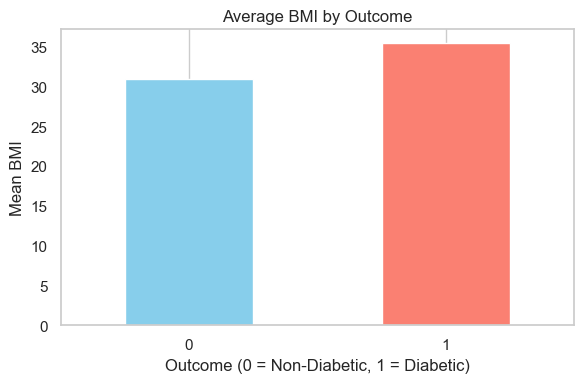

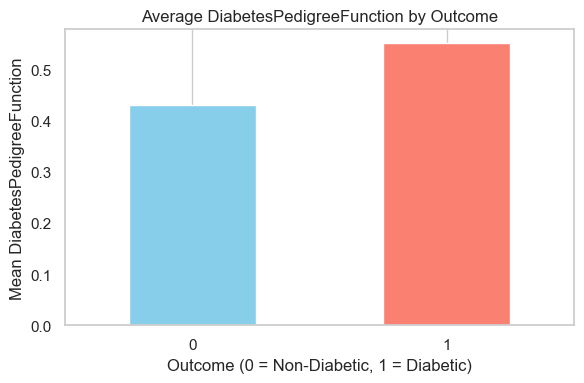

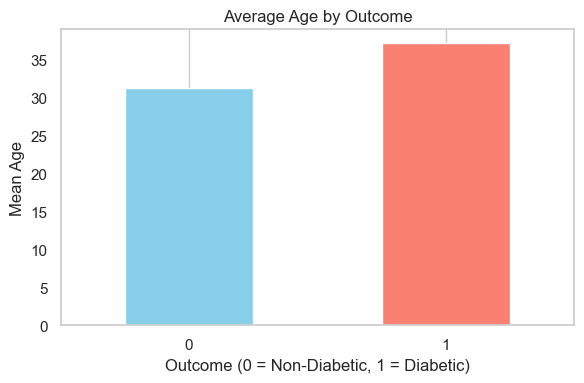

In [21]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    # Group by Outcome and calculate mean for the feature
    df.groupby('Outcome')[col].mean().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f"Average {col} by Outcome")
    plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
    plt.ylabel(f"Mean {col}")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

###  Insights from our barchart :
- **Glucose, BMI, Insulin** are **significantly higher** in diabetic patients — key risk factors.
- **Age** and **DiabetesPedigreeFunction** show **moderate increase**, suggesting age and heredity influence
- **SkinThickness** and **BloodPressure** show **minimal difference** — may be less predictive.
- **Pregnancies** are **slightly higher** in diabetics, possibly linked to **gestational diabetes**.

## 8.3 Scatter Plots
A scatter plot shows individual data points on a 2D graph to visualize the relationship between two numerical variables.
It helps identify patterns, clusters, correlations, and outliers in the data.

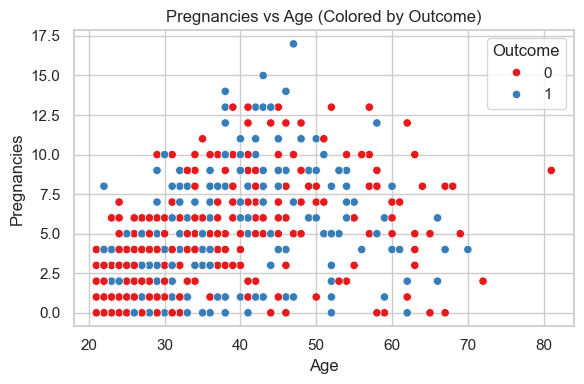

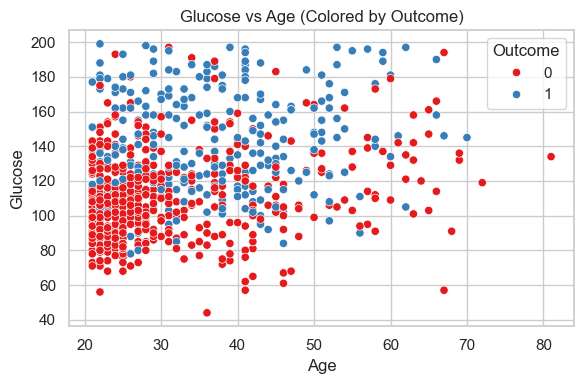

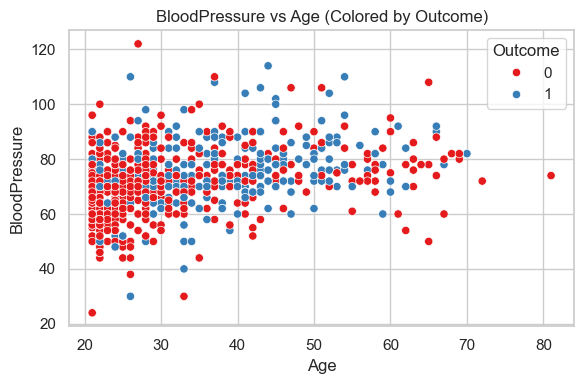

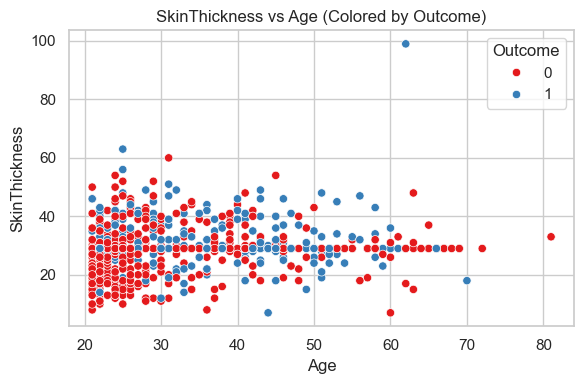

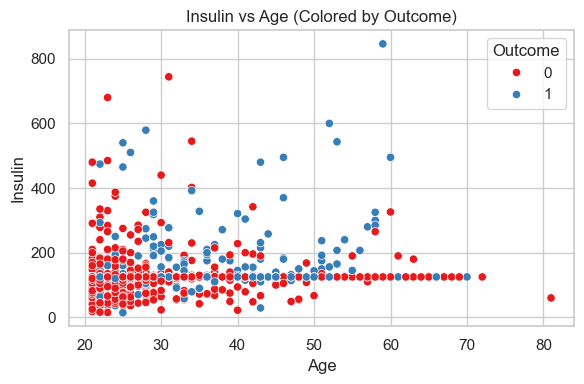

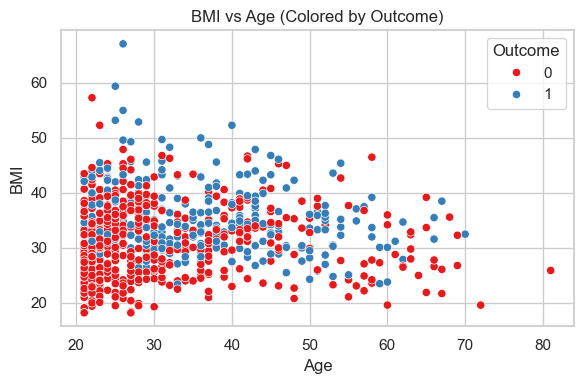

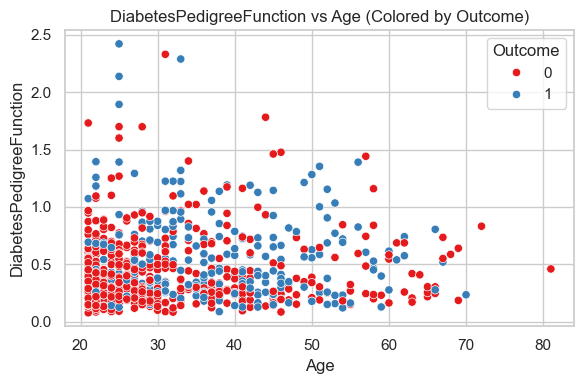

In [22]:
for col in df.columns[:-1]:
    if col != 'Age':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x='Age', y=col, hue='Outcome', palette='Set1')
        plt.title(f"{col} vs Age (Colored by Outcome)")
        plt.xlabel("Age")
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

###  Insights from our scatter plots :
- Glucose vs Age: Diabetics show higher glucose, especially in middle to older ages.
- BMI vs Age: Higher BMI (often >30) in diabetics, especially above age 40 — indicates obesity link.
- Insulin vs Age: Diabetics show extremely high insulin values — possible outliers or insulin resistance.
- BloodPressure & SkinThickness: No clear pattern observed — suggests weak correlation with age or outcome.
- Pregnancies vs Age: Pregnancies increase with age, slightly more in diabetics — hints at gestational diabetes.

## 3. Multivariate Analysis

**What it means:**  
We analyze **three or more variables at the same time**.

**Why we do it:**  
To explore complex interactions and patterns in high-dimensional data:
- See how features relate to each other
- Detect multicollinearity (strongly correlated inputs)
- Identify clusters or patterns among groups

**Examples from our dataset:**
- Correlation heatmap of the entire dataset

**When to use:**  
When you want to **look at the big picture** — how multiple features behave together and whether they're helpful for prediction.


Text(0.5, 1.0, 'Correlation Heatmap')

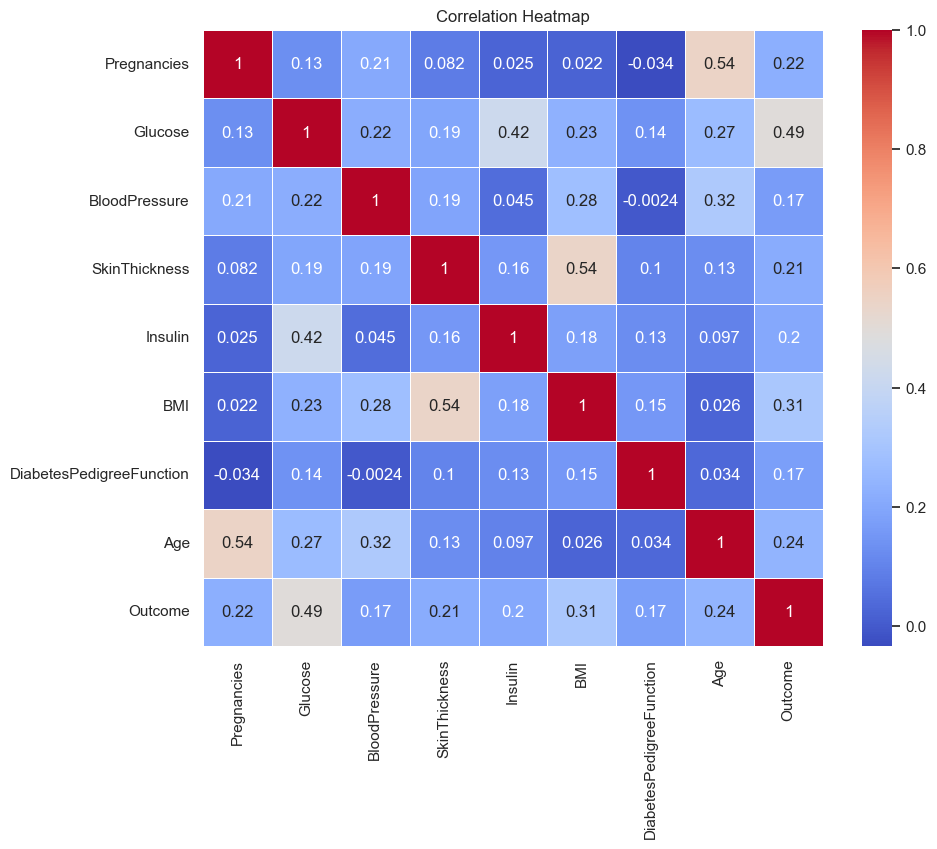

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")

I used the correlation heatmap to find how each variable is related to Outcome, which is our target (diabetic or not).

The heatmap shows:

Glucose has the strongest correlation (0.49) with diabetes, so it’s a key predictor.

BMI and Age also contribute moderately.

This helped me identify which features are most useful for prediction.

## 11. Summary of Insights

- **Glucose, BMI, and Age** are strong indicators of diabetes.
- We cleaned the dataset: replaced zeroes with NaN and then filled them using the **median**.
- No duplicate or wrong data types found.
- Outliers exist in Insulin, SkinThickness, but dataset is overall clean.
- Relationships between features and Outcome are meaningful.
- Dataset is now **ready for machine learning**.


In [24]:
df.to_csv("cleaned_diabetes_dataset.csv", index=False)


###  Explanation:
We export the cleaned dataset to a CSV file.  
This allows us to reuse the clean version later 